# **MVP Sprint 2: Análise de Dados e Boas Práticas**
**Nome: Daniel Balthazar**

Neste notebook, apresento os gráficos, descrições e conclusões referentes às análises realizadas. O objetivo é fornecer uma visão clara e detalhada dos dados, aplicando boas práticas de análise e visualização.



## **Definição do problema:**  

**Descrição do Problema:**  
O problema envolve prever o comportamento do cliente em relação à assinatura de um produto bancário específico (depósito a prazo), com base em variáveis demográficas, financeiras e de interação anteriores. A tarefa é classificar os clientes como prováveis assinantes ("yes") ou não ("no").

**Tipo de Problema:**  
Este é um problema de aprendizado supervisionado, pois o conjunto de dados possui uma variável-alvo (y) e o objetivo é fazer uma classificação binária. O modelo deverá aprender com os dados rotulados (informações passadas sobre os clientes e suas respostas anteriores) para prever se novos clientes irão ou não assinar o depósito.

**Premissas e Hipóteses:**  
Algumas premissas e hipóteses que podemos fazer sobre o problema incluem:  

* Clientes com maiores saldos bancários ou em determinadas faixas etárias podem ser mais propensos a assinar.
* O resultado de campanhas anteriores pode influenciar a decisão do cliente na campanha atual.
* A duração da ligação e o tipo de contato (telefone ou celular) podem afetar o grau de interesse do cliente.
* A existência de empréstimos pessoais ou habitacionais pode estar associada a uma menor probabilidade de assinatura do depósito.

**Restrições e Condições dos Dados:**  
Os dados foram selecionados com base em campanhas de marketing telefônico, contendo 16 atributos que abrangem desde características financeiras dos clientes até informações sobre o histórico de interações nas campanhas. A variável-alvo (y) é binária e representa a decisão de assinatura ou não.

**Definição dos Atributos**  
1 - age: Idade do cliente.  
2 - job: Ocupação do cliente (ex.: administrador, operário, estudante).  
3 - marital: Estado civil (casado, solteiro, divorciado).  
4 - education: Nível de escolaridade (primário, secundário, terciário).  
5 - default: O cliente tem crédito em situação de inadimplência? (sim, não).  
6 - balance: Saldo bancário médio anual, em euros.  
7 - housing: O cliente possui financiamento habitacional? (sim, não).  
8 - loan: O cliente tem um empréstimo pessoal? (sim, não).  
9 - contact: Meio de contato utilizado (telefone, celular).  
10 - day: Dia do último contato.  
11 - month: Mês do último contato (janeiro a dezembro).  
12 - duration: Duração da última ligação, em segundos.  
13 - campaign: Quantidade de contatos feitos durante a campanha atual.  
14 - pdays: Dias desde o último contato numa campanha anterior (valores negativos indicam que não houve contato anterior).  
15 - previous: Número de contatos realizados em campanhas anteriores.  
16 - poutcome: Resultado da última campanha (sucesso, falha, desconhecido).  
17 - y: O cliente assinou o depósito a prazo? (sim, não).  

link dataset: https://www.kaggle.com/datasets/saranyaponnarasu/bank-marketing-term-deposits-classification

## **Análise de dados**

#### **Bibliotecas utilizadas**

In [ ]:
# bibliotecas
import pandas as pd
import numpy as np
import seaborn as sns
import missingno as ms
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.patches import Patch, Polygon
from matplotlib.lines import Line2D
from scipy.stats import pointbiserialr
from IPython.display import display, Markdown
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

#### **Funções utilizadas**

In [ ]:
## Funções


def load_data(file_path: str) -> pd.DataFrame:
    """
    Carrega dados de um arquivo CSV.

    Parâmetros:
    file_path (str): Caminho para o arquivo CSV.

    Retorna:
    pd.DataFrame: DataFrame com os dados carregados do arquivo CSV.

    Exceções:
    Lança FileNotFoundError se o arquivo não for encontrado.
    Lança pd.errors.EmptyDataError se o arquivo estiver vazio.
    """
    try:
        # Tenta carregar os dados do arquivo CSV.
        data = pd.read_csv(file_path)
        return data

    except FileNotFoundError as e:
        # Mensagem de erro caso o arquivo não seja encontrado.
        print(f"Erro: Arquivo não encontrado: {file_path}")
        raise e  # Re-lança a exceção para tratamento externo.

    except pd.errors.EmptyDataError as e:
        # Mensagem de erro caso o arquivo esteja vazio.
        print(f"Erro: O arquivo está vazio: {file_path}")
        raise e  # Re-lança a exceção para tratamento externo.




def concatenate_tables(df1: pd.DataFrame, df2: pd.DataFrame) -> pd.DataFrame:
    """
    Concatena duas tabelas (DataFrames) verticalmente.

    Parâmetros:
    df1 (pd.DataFrame): Primeira tabela a ser concatenada.
    df2 (pd.DataFrame): Segunda tabela a ser concatenada.

    Retorna:
    pd.DataFrame: DataFrame resultante da concatenação de df1 e df2.

    Exceção:
    Lança ValueError se as colunas dos DataFrames não forem compatíveis para a concatenação.
    """
    try:
        # Concatena as tabelas verticalmente, ignorando os índices antigos.
        concatenated_df = pd.concat([df1, df2], ignore_index=True)
        return concatenated_df

    except ValueError as e:
        # Mensagem de erro para ajudar na depuração.
        print("Erro ao concatenar as tabelas. Verifique se as colunas estão compatíveis.")
        raise e  # Re-lança a exceção para que possa ser tratada pelo código que chamou a função.




def add_labels(ax, normalized_df):
    """
    Esta função adiciona rótulos de dados diretamente nas barras empilhadas, mostrando a proporção
    de cada categoria como percentual com duas casas decimais.

    Parâmetros:
    ax (matplotlib.axes._axes.Axes): O objeto 'axes' onde as barras empilhadas foram plotadas.
    normalized_df (pd.DataFrame): DataFrame contendo os dados normalizados (proporções) para serem exibidos nos rótulos.

    Funcionamento:
    - A função itera sobre os "containers" das barras empilhadas (ax.containers), que são os conjuntos de barras empilhadas para cada categoria.
    - Para cada barra (representada por 'v'), a altura da barra é verificada. Se a altura for maior que zero, isso significa que há uma barra visível, e portanto, um rótulo é criado.
    - O valor normalizado correspondente à categoria da barra é multiplicado por 100 para ser convertido em percentual e então formatado com duas casas decimais (usando f'{value:.2f}%').
    - Se a altura da barra for 0, nenhum rótulo é exibido para evitar rótulos em barras vazias.

    Passos da função:
    1. **Iteração sobre os containers de barras**: A função percorre cada "container" (conjunto de barras empilhadas), para garantir que rótulos sejam adicionados para todas as barras.
    2. **Verificação de altura da barra**: Se a barra tiver uma altura maior que 0, ela é considerada para receber um rótulo.
    3. **Conversão para percentual**: O valor da categoria da barra é buscado no DataFrame normalizado e multiplicado por 100, convertendo-o para uma porcentagem.
    4. **Exibição do rótulo**: O rótulo é adicionado no centro da barra usando `ax.bar_label` com o parâmetro `label_type='center'`, o que posiciona o rótulo dentro da barra.
    """
    for c in ax.containers:
        labels = []
        for v in c:
            height = v.get_height()
            if height > 0:
                # Usando os dados normalizados para rótulos como percentual com 2 casas decimais
                category = v.get_x() + v.get_width() / 2
                col_idx = list(ax.containers).index(c)
                value = normalized_df.iloc[int(category), col_idx] * 100  # Convertendo para percentual
                labels.append(f'{value:.2f}%')
            else:
                labels.append('')  # Caso a altura seja 0, não mostrar nada
        ax.bar_label(c, labels=labels, label_type='center')


def remove_outliers(df: pd.DataFrame, column: str) -> pd.DataFrame:
    """
    Remove outliers de uma coluna específica com base em 3 vezes o desvio padrão.

    Parâmetros:
    df (pd.DataFrame): O DataFrame que contém os dados.
    column (str): O nome da coluna da qual os outliers serão removidos.

    Retorna:
    pd.DataFrame: DataFrame filtrado sem os outliers da coluna especificada.

    Exceções:
    Lança KeyError se a coluna especificada não existir no DataFrame.
    Lança ValueError se a coluna contiver valores inválidos para o cálculo de média e desvio padrão.
    """
    try:
        # Calcula a média e o desvio padrão da coluna
        mean = df[column].mean()
        std = df[column].std()

        # Define os limites superior e inferior para identificar os outliers
        upper_bound = mean + 3 * std
        lower_bound = mean - 3 * std

        # Retorna o DataFrame filtrado sem os outliers
        return df[(df[column] <= upper_bound) & (df[column] >= lower_bound)]

    except KeyError as e:
        # Mensagem de erro caso a coluna não exista no DataFrame
        print(f"Erro: Coluna '{column}' não encontrada no DataFrame.")
        raise e  # Re-lança a exceção para tratamento externo.

    except ValueError as e:
        # Mensagem de erro caso a coluna tenha valores inválidos
        print(f"Erro: Coluna '{column}' contém valores inválidos para o cálculo.")
        raise e  # Re-lança a exceção para tratamento externo.

#### **Carregando Arquivos do Github**

In [ ]:
# Caminhos dos arquivos
file_path1 = 'https://raw.githubusercontent.com/Danielbalthazar/MVP_An-liseDeDados_e_BoasPr-ticas/main/Test.csv'
file_path2 = 'https://raw.githubusercontent.com/Danielbalthazar/MVP_An-liseDeDados_e_BoasPr-ticas/main/Train.csv'

# Carregar os dados
Teste = load_data(file_path1)
Treino = load_data(file_path2)

# Concatenar as tabelas
df_completo = concatenate_tables(Teste, Treino)

# Exibir as primeiras linhas da tabela concatenada
df_completo.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


### **Estatísticas descritivas**:

#### 1. **Quantidade de Atributos e instancias existentes**:


In [ ]:
# Quantidade de Atributos e instancias existentes:
num_instancias, num_atributos = df_completo.shape
print(f"Número de instâncias: {num_instancias}")
print(f"Número de atributos: {num_atributos}")

Número de instâncias: 49732
Número de atributos: 17


   - Temos 49732 Instâncias e 17 atributos

#### 2. **Tipos de dados dos atributos**:

In [ ]:
# Tipos de dados dos atributos
df_completo.dtypes

,0
age,int64
job,object
marital,object
education,object
default,object
balance,int64
housing,object
loan,object
contact,object
day,int64



   - Temos diferentes tipos de dados presentes nos atributos do nosso conjunto de dados. Os atributos podem ser categorizados em dois principais grupos: **numéricos** e **categóricos**.
   
   - **Atributos numéricos**: Estes atributos são representados por números inteiros (`int64`), e podem ser utilizados diretamente em cálculos e análises estatísticas. Os atributos numéricos no dataset são:
     - `age`: Idade do cliente.
     - `balance`: Saldo bancário do cliente.
     - `day`: Dia do mês em que o contato foi realizado.
     - `duration`: Duração do último contato em segundos.
     - `campaign`: Número de contatos realizados durante a campanha.
     - `pdays`: Número de dias desde o último contato da campanha anterior.
     - `previous`: Número de contatos realizados antes desta campanha.
   
   - **Atributos categóricos**: Estes atributos são representados por objetos (`object`), ou seja, são variáveis que contêm categorias ou rótulos. Eles precisam ser codificados em variáveis numéricas (usando técnicas como One-Hot Encoding) antes de serem usados em algoritmos de machine learning. Os atributos categóricos no dataset são:
     - `job`: Tipo de trabalho do cliente.
     - `marital`: Estado civil do cliente.
     - `education`: Nível de escolaridade do cliente.
     - `default`: Indica se o cliente tem crédito em default.
     - `housing`: Indica se o cliente possui um financiamento imobiliário.
     - `loan`: Indica se o cliente possui um empréstimo pessoal.
     - `contact`: Tipo de contato realizado (telefone celular ou fixo).
     - `month`: Mês em que o contato foi realizado.
     - `poutcome`: Resultado da campanha anterior.
     - `y`: Resposta binária se o cliente aceitou ou não o produto bancário.

#### 3. **Valores faltantes**:


<Axes: >

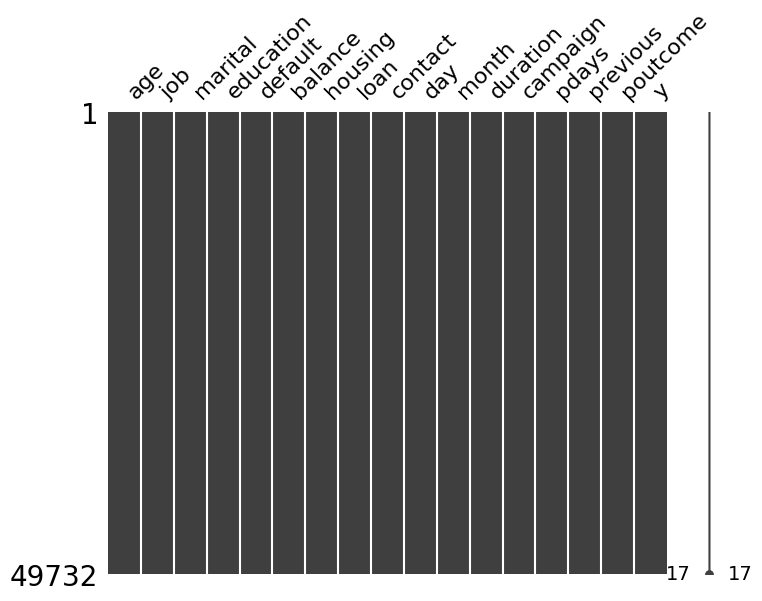

In [ ]:
# Verificando valores faltantes
ms.matrix(df_completo, figsize=(8, 6))

   - **Não temos valores faltantes, como mostro no gráfico**

#### 4. **Resumo estatístico dos atributos com valor numérico**  **negrito**

In [ ]:
# Resumo estatístico dos atributos com valor numérico:
df_completo.describe()

,age,balance,day,duration,campaign,pdays,previous
count,49732.000000,49732.000000,49732.000000,49732.000000,49732.000000,49732.000000,49732.000000
mean,40.957472,1367.761562,15.816315,258.690179,2.766549,40.158630,0.576892
std,10.615008,3041.608766,8.315680,257.743149,3.099075,100.127123,2.254838
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1431.000000,21.000000,320.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000



1. **Idade (age)**:  
   * A média de idade dos clientes é 40,9 anos, chegando ao máximo de 95 anos, mas **75% dos clientes têm até 48 anos**.

2. **Saldo bancário (balance)**:  
   * O saldo médio é de **1.367,76**, mas há uma grande dispersão nos dados, evidenciada pelo desvio padrão de **3.041,60**.  
   * O saldo mínimo é negativo, chegando a **-8.019**, o que indica que alguns clientes podem ter débitos.  
   * O saldo máximo é de **102.127**, mas 75% dos clientes tem até 1431 de saldo, sugerindo uma alta concentração de riqueza em alguns poucos clientes.

3. **Dia do mês da campanha (day)**:  
   * A maioria das interações ocorre em torno do dia **15 ou 16** do mês, com uma mediana de **16**.  
   * O dia mínimo registrado é **1**, e o máximo é **31**, representando o intervalo completo de dias de um mês.

4. **Duração das interações (duration)**:  
   * A mediana é de **180 segundos**, indicando que **50% das interações duram até 3 minutos**.  
   * A duração mínima é **0**, sugerindo que algumas interações podem não ter ocorrido ou terem sido extremamente curtas, enquanto a duração máxima chega a **4.918 segundos** (cerca de **1 hora e 22 minutos**).

5. **Número de campanhas (campaign)**:  
   * A maioria dos clientes foi contatada entre **1 e 3 vezes** (mediana de **2** e terceiro quartil de **3**), mas há casos de clientes contatados até **63 vezes**, o que pode indicar uma estratégia de campanha intensiva.

6. **Dias desde o último contato (pdays)**:  
   * Um valor de **-1** para **75% dos casos** indica que a maioria dos clientes não foi contatada anteriormente.  
   * Para os outros **25%**, a média de dias desde o último contato é **40**, com um valor máximo de **871 dias**, o que sugere uma grande dispersão no tempo de recontato.

7. **Quantidade de contatos anteriores (previous)**:  
   * A mediana e o terceiro quartil indicam que a maioria dos clientes (**75%**) não teve contatos anteriores (valor de **0**).  
   * No entanto, alguns clientes foram contatados várias vezes anteriormente, com um valor máximo de **275 contatos**.

###**Visualizações**:

#### **Analise sobre a Distribuição dos Atributos**:

##### **Analise Box Plot dos Atributos**:

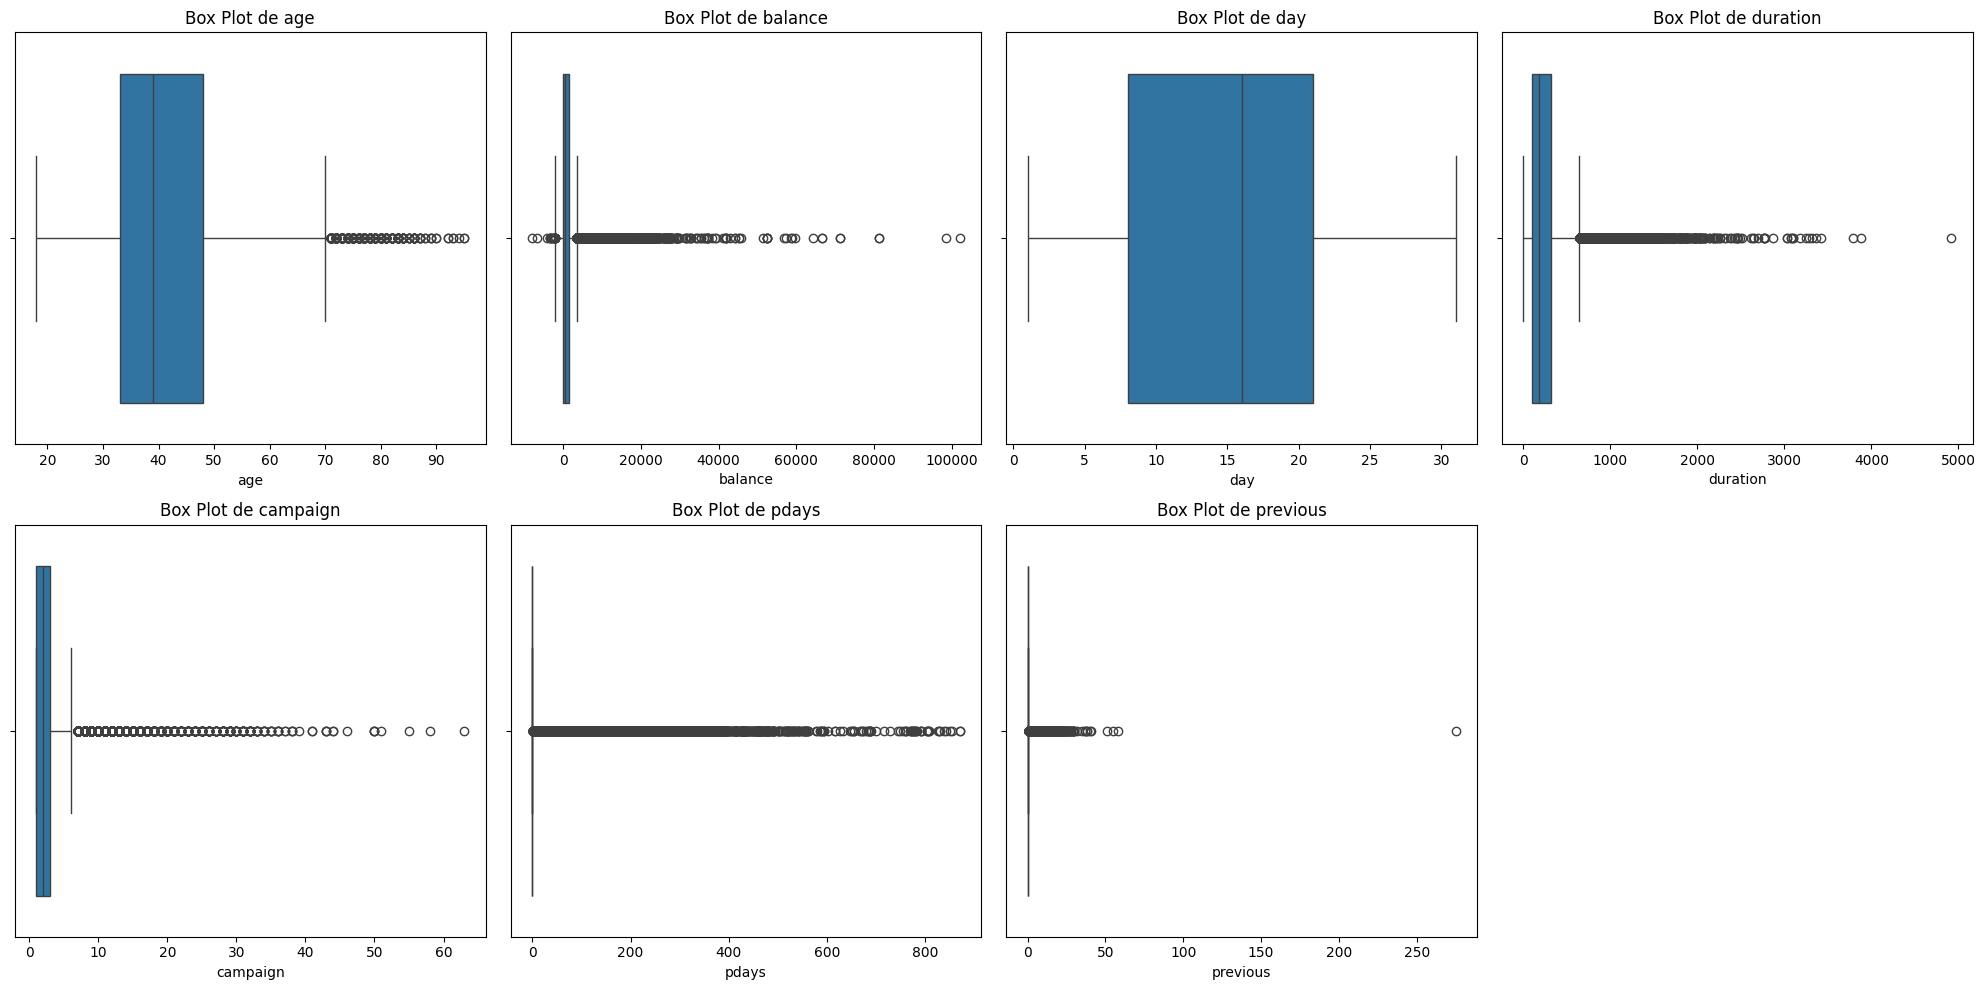

In [ ]:
#Boxplot

# Selecionar os atributos numéricos do DataFrame
numerical_columns = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

# Criar a figura e os eixos para o layout 2x4 (2 linhas e 4 colunas)
num_attributes = len(numerical_columns)
num_rows = (num_attributes + 3) // 4  # Ajusta o número de linhas com base no número de colunas
fig, axes = plt.subplots(nrows=num_rows, ncols=4, figsize=(20, num_rows * 5))

# Achatar o array de eixos se necessário
axes = axes.flatten()

# Criar um boxplot para cada atributo numérico
for i, col in enumerate(numerical_columns):
    sns.boxplot(x=df_completo[col], ax=axes[i])
    axes[i].set_title(f"Box Plot de {col}")

# Remover os eixos não utilizados, se houver
for j in range(len(numerical_columns), len(axes)):
    fig.delaxes(axes[j])

# Ajustar o layout para não sobrepor os gráficos
plt.tight_layout()
plt.show()


1. **Idade (age)**:
   - A variável `age` está bem distribuída entre aproximadamente 20 e 60 anos, com uma mediana em torno dos 40 anos.
   - Apesar da presença de alguns outliers, com idades superiores a 70 anos, esses valores não parecem exercer uma influência significativa sobre o conjunto de dados.
   - **Ação**: Não será necessário aplicar nenhum tratamento especial, como remoção de outliers ou normalização, visto que a distribuição de `age` é razoavelmente balanceada e interpretável.

2. **Saldo bancário (balance)**:
   - O saldo bancário está majoritariamente concentrado em torno de 0, porém há outliers significativos, com valores que chegam a mais de 100.000, o que pode influenciar a média e variância de maneira distorcida.
   - **Ação**: Para lidar com essa assimetria e comprimir os valores extremamente altos, será aplicada uma **Normalização**, o que tornará a distribuição de `balance` mais simétrica e facilitará a análise.

3. **Dia do mês da campanha (day)**:
   - A distribuição da variável `day`, que vai de 1 a 31, é uniforme, representando os dias do mês em que ocorreram os contatos das campanhas. Não há presença significativa de outliers.
   - **Ação**: Como se trata de uma variável categórica, não será necessário nenhum tratamento adicional, visto que sua distribuição é homogênea.

4. **Duração das interações (duration)**:
   - A maior parte das interações tem uma duração curta, com muitos valores próximos de 0 segundos. No entanto, há outliers que chegam a 5.000 segundos, o equivalente a quase 1 hora e 22 minutos.
   - **Ação**: Será criada uma categorização de `duration` em faixas (curta, média, longa e muito longa) para facilitar a análise.

5. **Número de campanhas (campaign)**:
   - A maioria dos clientes foi contatada entre 1 e 3 vezes, mas há casos de clientes que foram contatados mais de 60 vezes, o que configura outliers extremos.
   - **Ação**: Será aplicada a **remoção de outliers** para os valores mais extremos.

6. **Dias desde o último contato (pdays)**:
   - A maioria dos clientes tem `pdays` com valor -1, indicando que não foram contatados anteriormente. No entanto, para os clientes que foram contatados, há valores que chegam a mais de 800 dias, caracterizando outliers.
   - **Ação**: Será criada uma **flag binária** para indicar se o cliente foi contatado recentemente (1) ou não (0), simplificando a variável e facilitando a análise. A transformação logarítmica pode ser aplicada para os valores restantes, a fim de comprimir os valores mais extremos.

**Considerações Finais**:
- As variáveis que apresentam **outliers**, como `balance`, `duration`, `campaign`, `pdays` e `previous`, passarão por um processo de **remoção de outliers** para garantir que os valores extremos não distorçam as análises e a modelagem.
- A variável `pdays` será simplificada com a criação de uma **flag binária** que indique se o cliente foi contatado recentemente ou não.
- Após esses tratamentos, será aplicada a **normalização** das variáveis numéricas para garantir que todas estejam na mesma escala e possam ser comparadas de maneira adequada durante a modelagem.

##### **Análise do Boxplot para cada atributo numérico, categorizado por 'Y'**:

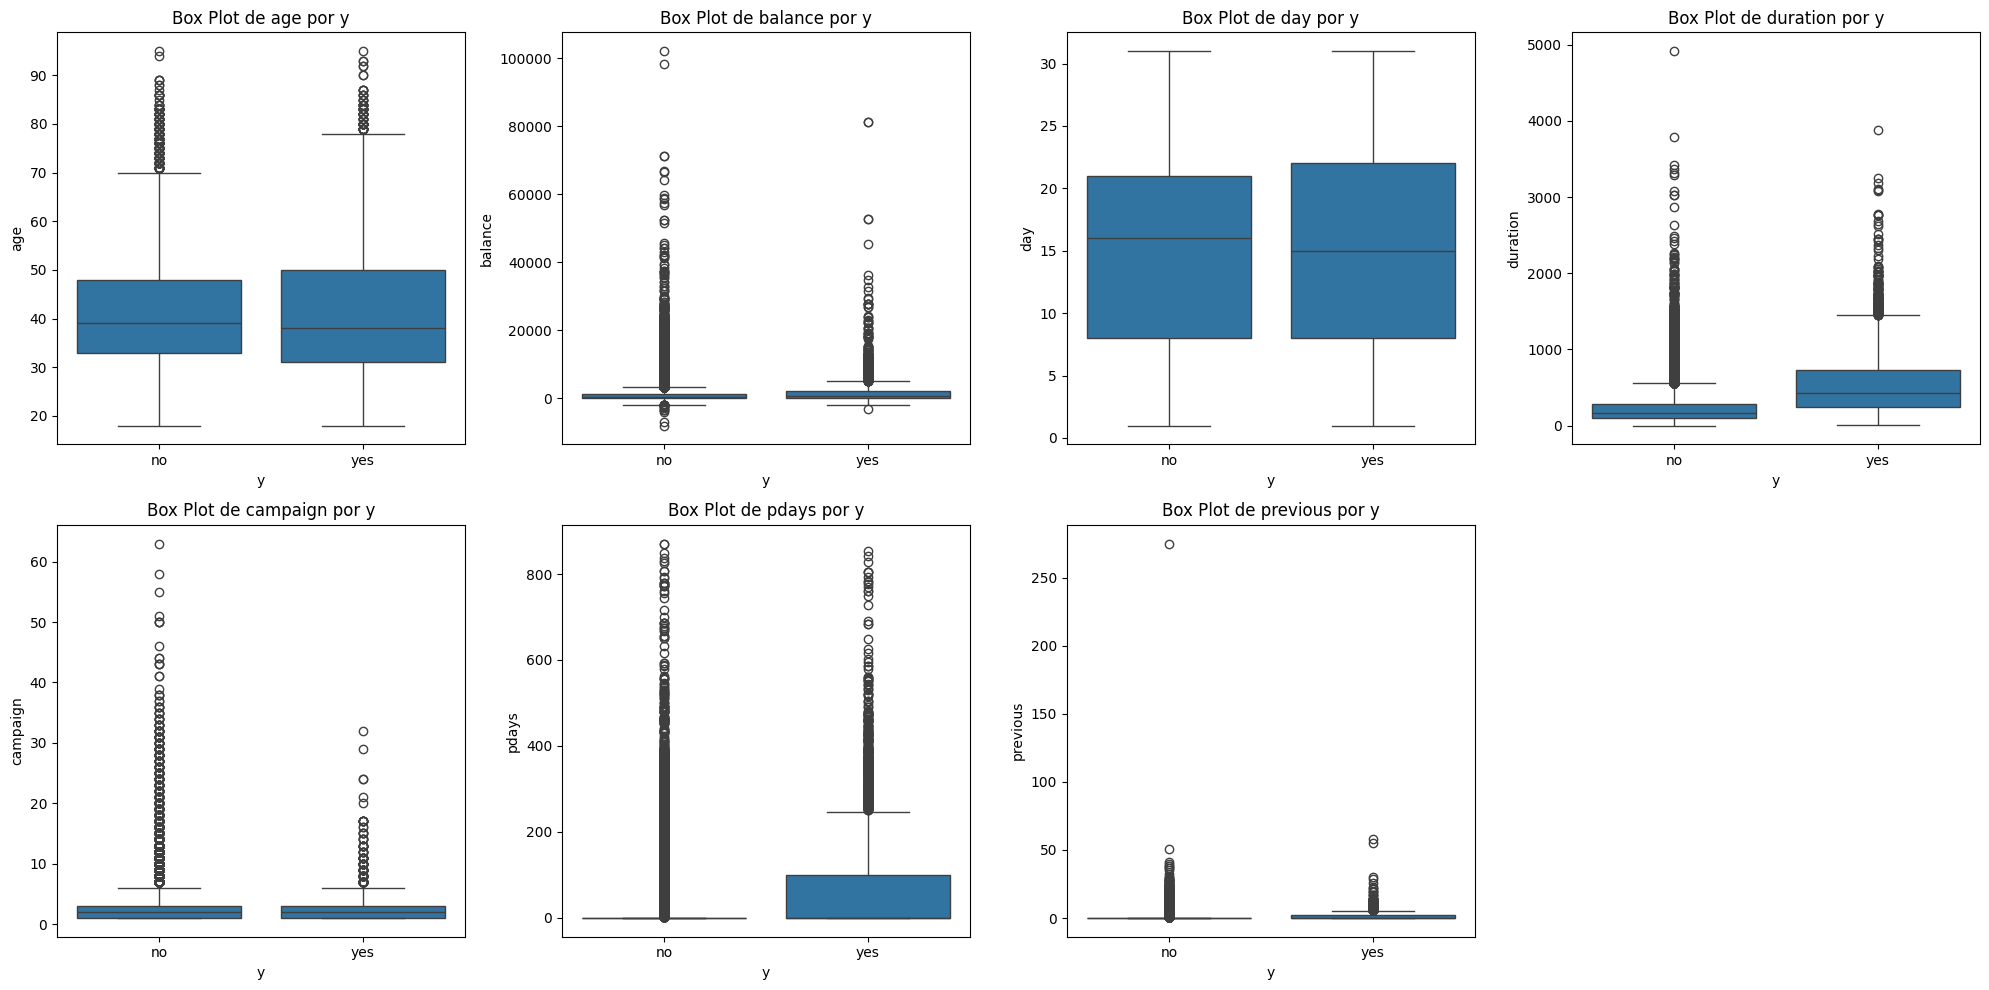

In [ ]:
# Selecionar os atributos numéricos do DataFrame
numerical_columns = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

# Criar a figura e os eixos para o layout 2x4 (2 linhas e 4 colunas)
num_attributes = len(numerical_columns)
num_rows = (num_attributes + 3) // 4  # Ajusta o número de linhas com base no número de colunas
fig, axes = plt.subplots(nrows=num_rows, ncols=4, figsize=(20, num_rows * 5))

# Achatar o array de eixos se necessário
axes = axes.flatten()

# Criar um boxplot para cada atributo numérico, categorizando por 'Y'
for i, col in enumerate(numerical_columns):
    sns.boxplot(x='y', y=col, data=df_completo, ax=axes[i])
    axes[i].set_title(f"Box Plot de {col} por y")

# Remover os eixos não utilizados, se houver
for j in range(len(numerical_columns), len(axes)):
    fig.delaxes(axes[j])

# Ajustar o layout para não sobrepor os gráficos
plt.tight_layout()
plt.show()



1. **Idade (`age`)**:
   - A distribuição da variável `age` é bastante semelhante entre os grupos que aceitaram e os que recusaram o produto (`Y = sim` e `Y = não`). A mediana da idade está próxima para ambos os grupos, e não há evidências visuais de que a idade seja um fator determinante para a aceitação do produto.
   - **Conclusão**: A idade provavelmente não desempenha um papel significativo na decisão de aceitar ou não o produto oferecido.

2. **Saldo Bancário (`balance`)**:
   - A mediana dos saldos bancários é baixa em ambos os grupos, mas o que chama a atenção é a grande quantidade de outliers, especialmente entre aqueles que recusaram o produto (`Y = não`). Clientes com saldos extremamente altos parecem estar mais concentrados no grupo que não aceitou a oferta.
   - **Conclusão**: A presença de outliers significativos indica uma variabilidade considerável no saldo bancário. Isso sugere que o saldo pode influenciar a recusa, e os outliers podem estar distorcendo as medidas de centralidade, o que pode requerer um tratamento para normalização ou remoção de outliers.

3. **Dia do mês (`day`)**:
   - A variável `day` (dia do mês em que a campanha foi realizada) apresenta uma distribuição semelhante entre os grupos, sem grandes variações entre quem aceitou e quem recusou o produto.
   - **Conclusão**: O dia do contato parece não ter impacto significativo na decisão do cliente em aceitar ou não o produto. Isso reforça que essa variável é categórica e possivelmente menos influente para a modelagem.

4. **Duração da interação (`duration`)**:
   - Aqui vemos uma clara diferença entre os grupos. A duração das chamadas é significativamente maior para aqueles que aceitaram o produto (`Y = sim`). Isso sugere que quanto mais tempo o cliente passa na chamada, maior a probabilidade de ele aceitar a oferta.
   - **Conclusão**: A variável `duration` parece ser um fator determinante para a aceitação. Interações mais longas podem indicar maior engajamento do cliente, o que aumenta as chances de sucesso na oferta.

5. **Número de campanhas (`campaign`)**:
   - A maioria dos clientes foi contatada apenas uma vez, tanto para os que aceitaram quanto para os que recusaram. No entanto, observa-se um número maior de outliers no grupo que recusou o produto, indicando que múltiplos contatos podem não ter sido bem-sucedidos.
   - **Conclusão**: Muitos contatos repetidos não parecem resultar em maior aceitação do produto. Na verdade, campanhas com muitos contatos podem estar associadas à rejeição, indicando possível saturação ou insistência desnecessária.

6. **Dias desde o último contato (`pdays`)**:
   - A maior concentração de valores está próxima de 0, sugerindo que muitos clientes não foram contatados recentemente. Contudo, há uma maior presença de outliers no grupo que recusou o produto, o que pode indicar que clientes contatados muito tempo após o último contato tendem a recusar a oferta.
   - **Conclusão**: O tempo desde o último contato parece influenciar a decisão do cliente, especialmente para aqueles que foram contatados muito depois da última interação. Esses valores extremos podem necessitar de uma transformação ou categorização para melhorar a análise.

7. **Número de contatos anteriores (`previous`)**:
   - A maioria dos clientes teve poucos contatos anteriores, com a maioria dos valores concentrados em torno de 0. Não há uma diferença expressiva entre os grupos que aceitaram e os que recusaram o produto.
   - **Conclusão**: A variável `previous` não parece desempenhar um papel significativo na aceitação do produto, dado que a distribuição é semelhante entre os grupos. Possivelmente, o histórico de contatos anteriores não é um forte indicador para a tomada de decisão neste caso.

**Considerações Finais**:
- As variáveis `balance`, `duration`, `campaign` e `pdays` mostram diferenças importantes entre os grupos e podem ser fortes candidatas para modelagem preditiva.
- Outliers presentes em `balance`, `duration`, `campaign` e `pdays` sugerem a necessidade de transformação ou remoção para evitar distorções na análise.
- Variáveis como `age`, `day` e `previous` têm distribuições semelhantes entre os grupos, indicando que podem não ser tão influentes para a modelagem.

##### **Análise das Distribuições das Variáveis**

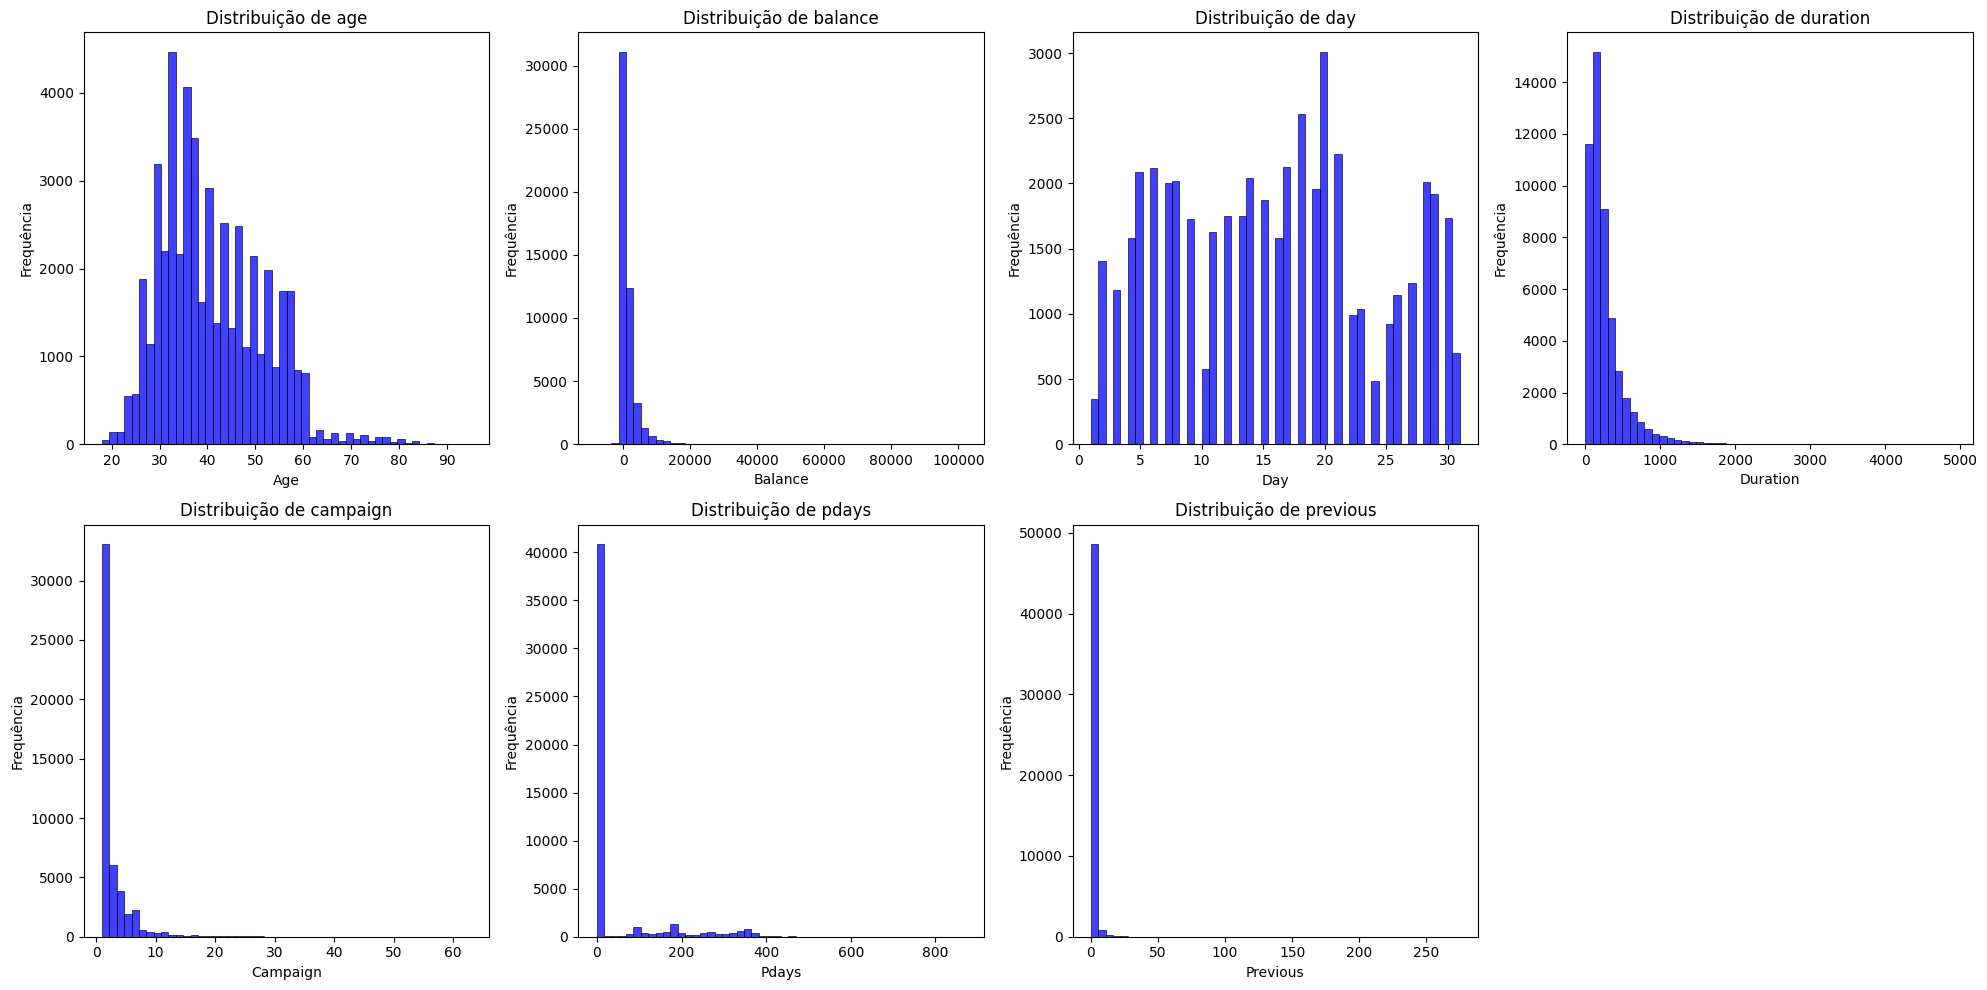

In [ ]:
# Lista de variáveis numéricas
numerical_columns = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

# Definir o layout 2x4 (2 linhas, 4 colunas)
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(20, 10))  # Ajuste o tamanho conforme necessário
axes = axes.flatten()  # Achatar o array de eixos para fácil iteração

# Loop para criar um histograma para cada variável numérica
for i, column in enumerate(numerical_columns):
    sns.histplot(df_completo[column], bins=50, kde=False, color='blue', ax=axes[i])
    axes[i].set_title(f'Distribuição de {column}')
    axes[i].set_xlabel(column.capitalize())
    axes[i].set_ylabel('Frequência')

# Remover os eixos não utilizados, se houver menos de 8 variáveis
for j in range(len(numerical_columns), len(axes)):
    fig.delaxes(axes[j])

# Ajustar o layout para evitar sobreposição
plt.tight_layout()
plt.show()



1. **Distribuição de `age` (Idade)**:
   - **Distribuição**: **Assimétrica à esquerda** (ou **negativamente assimétrica**).
   - **Descrição**: A maioria dos valores está concentrada entre 20 e 60 anos, com uma cauda longa se estendendo para a direita, o que indica poucos indivíduos acima de 60 anos.

2. **Distribuição de `balance` (Saldo bancário)**:
   - **Distribuição**: **Altamente assimétrica à direita** (ou **positivamente assimétrica**).
   - **Descrição**: A maior parte dos clientes possui saldo próximo de 0, com uma cauda longa se estendendo para a direita, indicando que há clientes com saldos muito altos.

3. **Distribuição de `day` (Dia do mês da campanha)**:
   - **Distribuição**: **Multimodal**.
   - **Descrição**: A distribuição é relativamente uniforme ao longo dos dias do mês, mas há picos em torno de certos dias, como o dia 15 e outros dias, o que sugere que há mais contatos em alguns dias específicos.

4. **Distribuição de `duration` (Duração da interação)**:
   - **Distribuição**: **Altamente assimétrica à direita** (ou **positivamente assimétrica**).
   - **Descrição**: A maior parte das interações tem uma duração curta, com uma cauda longa que se estende para interações muito longas.

5. **Distribuição de `campaign` (Número de campanhas)**:
   - **Distribuição**: **Altamente assimétrica à direita** (ou **positivamente assimétrica**).
   - **Descrição**: A maioria dos clientes foi contatada poucas vezes (1 a 3 campanhas), mas há alguns outliers que foram contatados muitas vezes, conforme mostra a cauda à direita.

6. **Distribuição de `pdays` (Dias desde o último contato)**:
   - **Distribuição**: **Altamente assimétrica à direita** (ou **positivamente assimétrica**).
   - **Descrição**: A maioria dos clientes nunca foi contatada anteriormente (indicada por `pdays = -1`), enquanto alguns foram contatados há muito tempo, o que cria uma cauda à direita.

7. **Distribuição de `previous` (Quantidade de contatos anteriores)**:
   - **Distribuição**: **Altamente assimétrica à direita** (ou **positivamente assimétrica**).
   - **Descrição**: A maior parte dos clientes não teve contatos anteriores, mas há poucos clientes que tiveram muitos contatos, o que cria uma cauda à direita.
   

 **Considerações Finais**:
- A maioria das variáveis apresenta distribuições **assimétricas à direita**, indicando que a maioria dos valores está concentrada em um intervalo pequeno, enquanto poucos valores são excepcionalmente grandes (outliers).
- A variável **day** é a única que apresenta uma **distribuição multimodal**, o que reflete que o contato da campanha é mais frequente em determinados dias do mês.

##### **Distribuição de Frequência das Classes (Gráfico e Tabela)**

In [ ]:
# Supondo que df seja o seu DataFrame e 'y' seja a coluna de classes
distribuicao_classes = df_completo['y'].value_counts()

# Calcular a porcentagem de cada classe
total_classes = len(df_completo['y'])
porcentagem_classes = (distribuicao_classes / total_classes) * 100

# Exibir a distribuição de frequência das classes
print(distribuicao_classes)
print(porcentagem_classes)

y
no     43922
yes     5810
Name: count, dtype: int64
y
no     88.317381
yes    11.682619
Name: count, dtype: float64


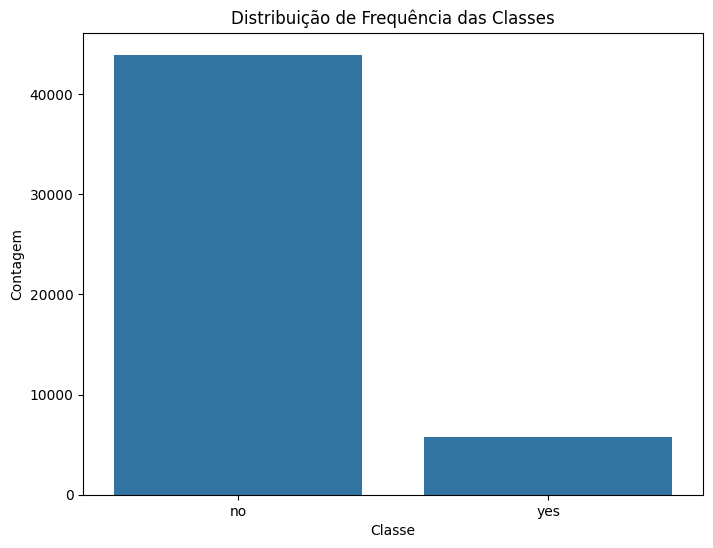

In [ ]:
# Criar um gráfico de barras para a distribuição de classes
plt.figure(figsize=(8, 6))
sns.countplot(x='y', data=df_completo)
plt.title('Distribuição de Frequência das Classes')
plt.xlabel('Classe')
plt.ylabel('Contagem')
plt.show()



1. **Valores Tabulares**:
   - A tabela numérica confirma a observação visual do gráfico:
     - A classe **"no"** contém **43.922 amostras**.
     - A classe **"yes"** contém **5.810 amostras**.
   - Quando observamos a **proporção percentual**:
     - **88,31%** das amostras pertencem à classe "no".
     - Apenas **11,68%** das amostras pertencem à classe "yes".
    
2. **Gráfico de Barras**:
   - O gráfico mostra a **distribuição de frequência** das duas classes (`yes` e `no`) na variável `y`. A classe "no" (clientes que **não** aceitaram a oferta) possui uma quantidade muito maior de amostras em comparação com a classe "yes" (clientes que **aceitaram** a oferta). Isso indica que o conjunto de dados está **desequilibrado**.
   - A classe "no" domina o conjunto de dados, com mais de **40.000 amostras**, enquanto a classe "yes" possui menos de **6.000 amostras**.


   
**Considerações Finais**:
   - A distribuição **desequilibrada** das classes pode impactar a performance dos modelos de machine learning, pois modelos tendem a prever a classe majoritária ("no") com mais frequência, o que pode resultar em baixa acurácia para a classe minoritária ("yes").
   - **Ação**: Sera importante aplicar técnica de balanceamento de dados, como **SMOTE** (Synthetic Minority Over-sampling Technique), para lidar com esse desequilíbrio e melhorar a capacidade preditiva do modelo para a classe minoritária.
   

##### **Distribuição Normalizada das categoria**

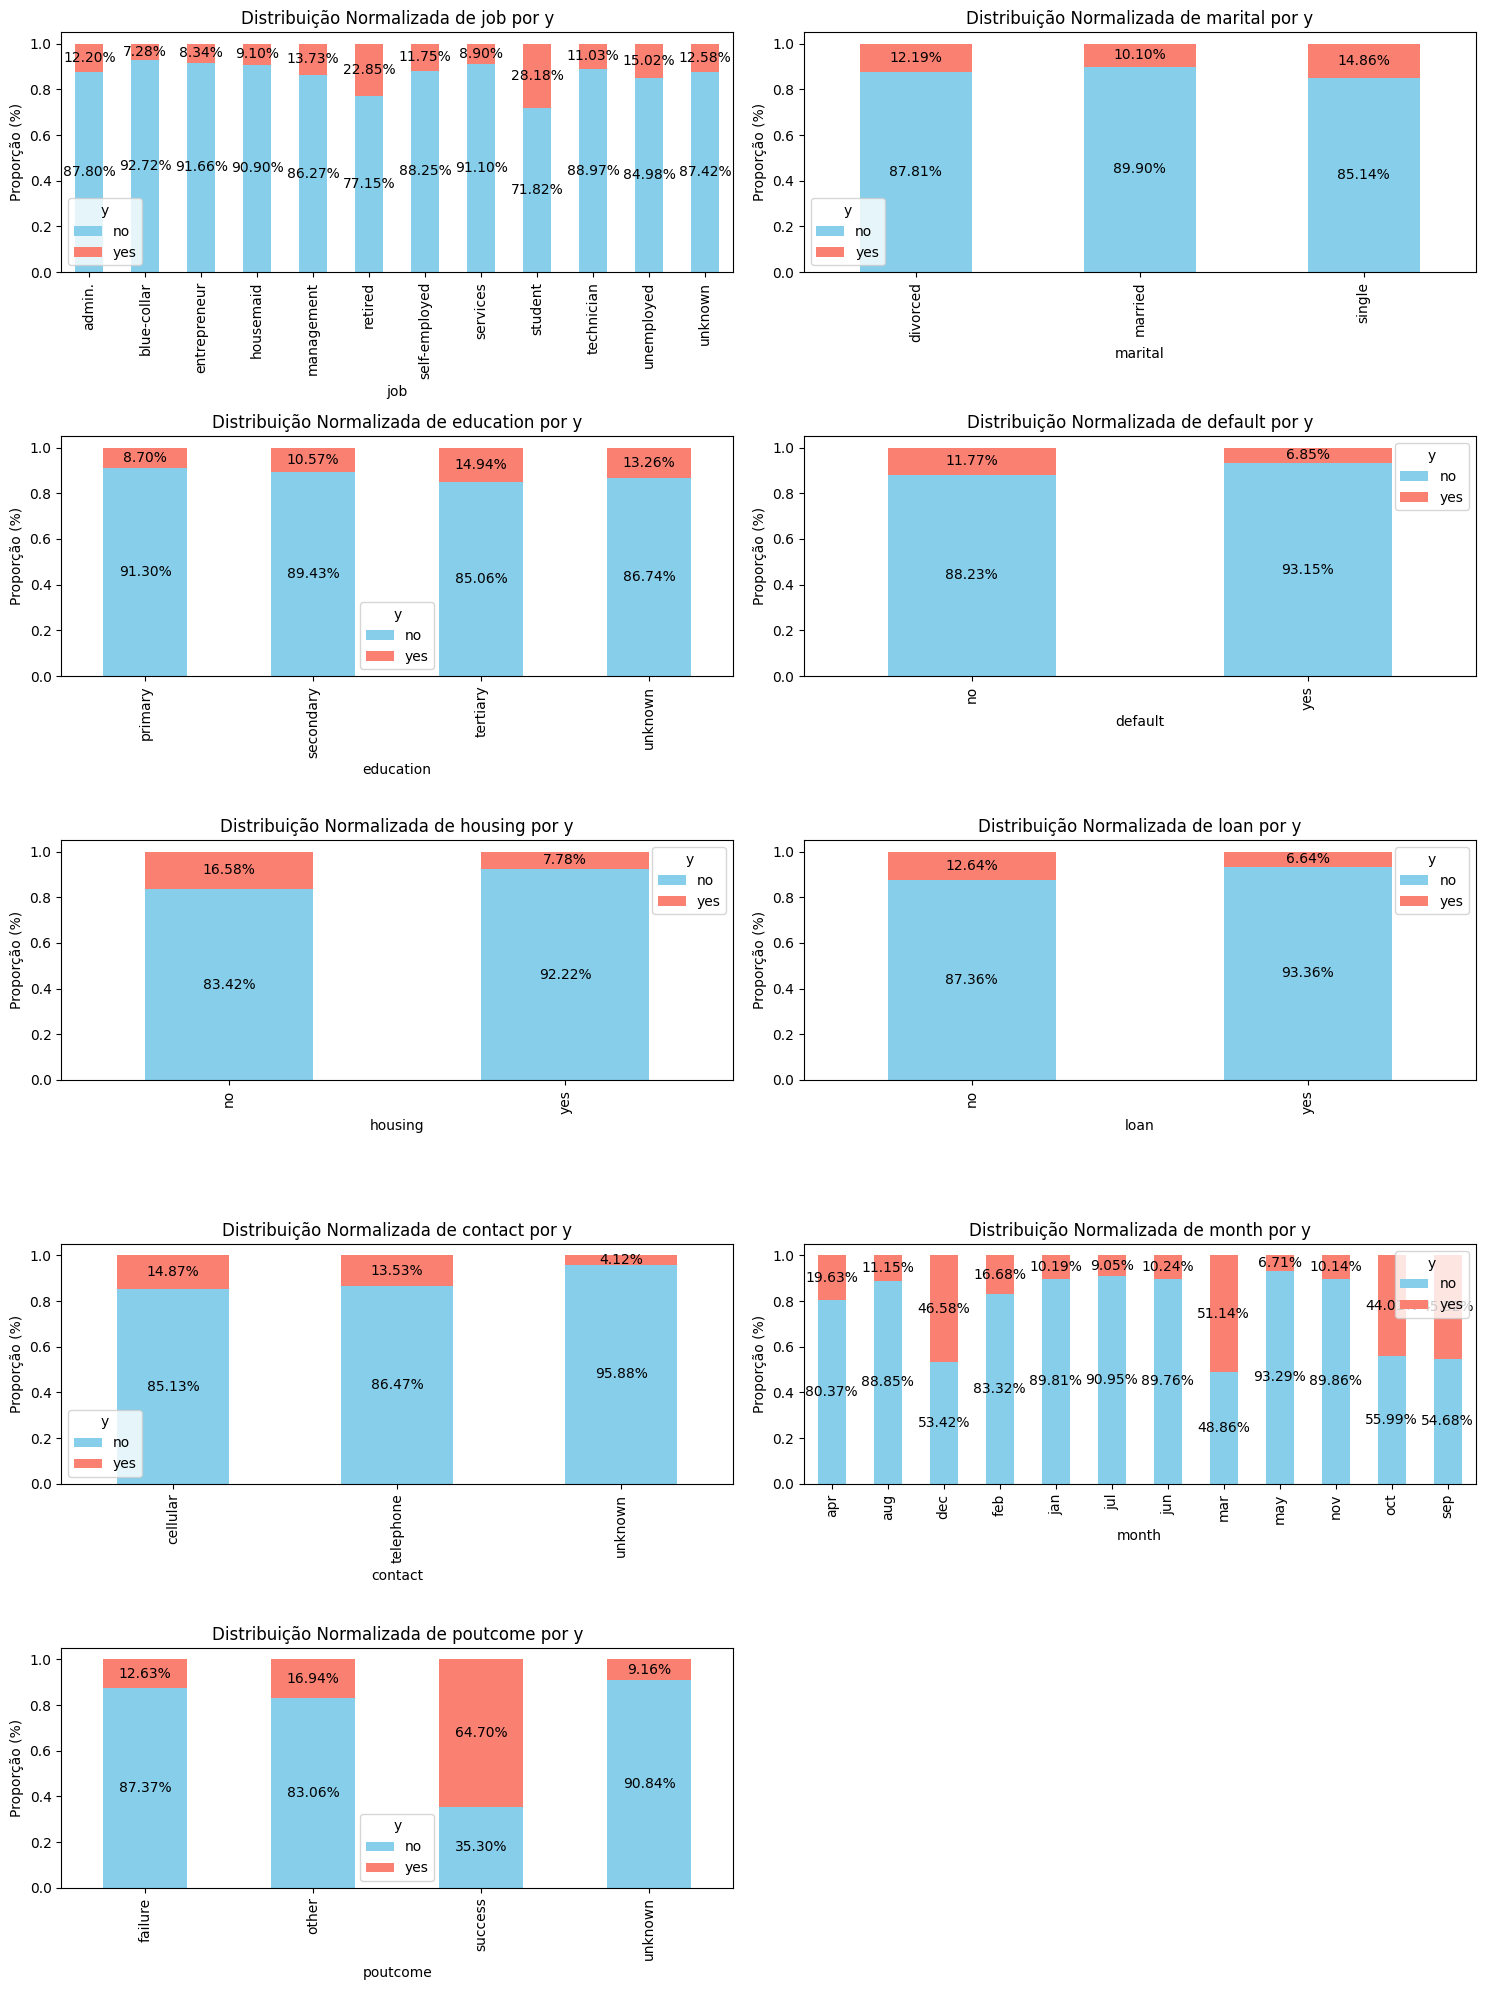

In [ ]:
# Variáveis categóricas no DataFrame
categorical_columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']

# Definindo o tamanho da figura para os gráficos
plt.figure(figsize=(15, 20))

# Criando os gráficos de barras empilhadas
for i, column in enumerate(categorical_columns, 1):
    plt.subplot(len(categorical_columns)//2 + 1, 2, i)  # Ajuste dinâmico do layout

    # Criando a tabela de contingência normalizada
    cross_tab = pd.crosstab(df_completo[column], df_completo['y'], normalize='index')

    # Plotando os dados normalizados
    ax = cross_tab.plot(kind='bar', stacked=True, ax=plt.gca(), color=['skyblue', 'salmon'])

    # Adicionando os rótulos utilizando a função add_lables
    add_labels(ax, cross_tab)

    # Configurações do gráfico
    plt.title(f'Distribuição Normalizada de {column} por y')
    plt.ylabel('Proporção (%)')
    plt.xlabel(column)

# Ajustar o layout para que os gráficos não sobreponham
plt.tight_layout()
plt.show()



1. **Job (Trabalho)**   
   A análise das profissões dos clientes revela que a taxa de aceitação (em vermelho) varia bastante entre as diferentes categorias profissionais. Profissionais da área de **management** (gestão) (28.18%) e **entrepreneur** (empreendedor) (20.18%) apresentam as maiores taxas de aceitação do produto bancário, enquanto **blue-collar** (trabalhador braçal) (7.28%) e **services** (serviços) (13.73%) estão entre as categorias com menores taxas de adesão. Profissões como **student** (estudante) (20.18%) e **unemployed** (desempregado) (13.02%) também mostram uma taxa de aceitação maior do que a média, sugerindo que pessoas com profissões mais instáveis ou de maior nível de gestão tendem a ser mais receptivas ao produto. Isso pode refletir uma disposição maior a aderir a produtos financeiros por parte desses grupos.

2. **Marital (Estado Civil)**   
   Os dados mostram que clientes **divorced** (divorciado) (12.19%) e **single** (solteiro) (14.86%) apresentam taxas de aceitação ligeiramente superiores quando comparados aos clientes **married** (casado) (10.10%). Isso sugere que o estado civil pode influenciar na disposição de aceitação, com clientes divorciados ou solteiros demonstrando uma maior probabilidade de aceitar o produto bancário. Essa tendência pode estar associada a diferentes perfis financeiros ou necessidades entre esses grupos.

3. **Education (Educação)**   
   A variável `education` (educação) revela que clientes com nível educacional **tertiary** (terciário) (14.94%) têm maior propensão a aceitar o produto, seguidos por aqueles com **secondary** (secundário) (10.57%) e **primary** (primário) (8.70%). Clientes com educação **unknown** (desconhecido) (13.26%) também apresentam uma taxa de aceitação significativa, apesar de sua categoria ser ambígua. Isso pode sugerir que um nível mais elevado de educação correlaciona com uma maior probabilidade de aceitação, possivelmente devido a uma melhor compreensão financeira ou maior disposição para se comprometer com produtos bancários.

4. **Default (Débito em Cartão ou Cheques)**   
   O gráfico de `default` mostra uma forte diferença: clientes que não têm histórico de inadimplência (**no** - não, 11.77%) têm uma maior taxa de aceitação do que aqueles com histórico de inadimplência (**yes** - sim, 6.85%). Isso sugere que clientes sem histórico de débitos estão mais inclinados a aceitar o produto bancário, talvez porque já estejam em uma melhor situação financeira, tornando-os mais receptivos.

5. **Housing (Possuir Habitação Própria)**   
   Para a variável `housing`, clientes que **não possuem** casa própria (16.58%) têm uma taxa de aceitação significativamente maior em comparação com aqueles que **possuem** (7.78%). Isso sugere que clientes que ainda não adquiriram um imóvel podem estar mais propensos a aceitar produtos financeiros que os ajudem a melhorar sua situação ou que ofereçam segurança financeira.

6. **Loan (Empréstimo Pessoal)**   
   A análise de `loan` (empréstimo) revela uma tendência semelhante ao gráfico de `housing`. Clientes que **não possuem** empréstimos (12.64%) têm maior taxa de aceitação em comparação com aqueles que **possuem** empréstimos pessoais (6.64%). Isso indica que clientes que não estão comprometidos com um empréstimo podem estar mais dispostos a aceitar novos produtos bancários, ao passo que clientes com empréstimos podem estar menos dispostos devido às suas obrigações financeiras existentes.

7. **Contact (Tipo de Contato)**   
   O tipo de contato também influencia significativamente a aceitação do produto. Clientes contatados por **celular** (14.87%) e **telefone fixo** (13.53%) apresentam taxas de aceitação razoáveis, mas é interessante notar que aqueles com **tipo de contato desconhecido** (4.12%) têm uma taxa muito mais baixa. Isso indica que a forma de contato é relevante para o sucesso da campanha, com contatos por celular tendo uma ligeira vantagem.

8. **Month (Mês de Contato)**   
   Ao analisar os meses de contato, notamos uma variação significativa na aceitação ao longo do ano. Clientes contatados nos meses de **março** (51.14%) e **dezembro** (48.86%) apresentam as maiores taxas de aceitação, seguidos por **outubro** (55.99%). Por outro lado, **maio** (44.09%) e **setembro** (54.68%) têm as menores taxas. Isso sugere que o período do ano em que o contato é feito pode ter um impacto relevante na aceitação do produto, possivelmente devido a fatores sazonais ou de planejamento financeiro.

9. **Poutcome (Resultado da Campanha Anterior)**   
   O `poutcome` (resultado da campanha anterior) tem uma influência muito clara na aceitação do produto. Clientes cuja campanha anterior foi um **successo** (sucesso) têm uma taxa de aceitação muito alta (64.70%), enquanto aqueles que experimentaram um **failure** (falha) anterior têm uma taxa de aceitação significativamente menor (12.63%). Esse dado destaca a importância do sucesso de campanhas anteriores para aumentar a propensão do cliente a aceitar novos produtos.

**Considerações Gerais:**   
Com base nesses gráficos, podemos ver que fatores como a **profissão** (job), o **estado civil** (marital), o **nível educacional** (education), e até o **mês de contato** (month) desempenham um papel importante na aceitação do produto bancário. As taxas de aceitação variam consideravelmente entre diferentes grupos, e isso oferece insights valiosos para segmentação de campanhas futuras. Um ponto particularmente importante é o impacto do **resultado da campanha anterior** (poutcome) no sucesso atual, indicando que uma estratégia de acompanhamento eficaz pode aumentar significativamente as taxas de conversão.

#### **Analise sobre a correlação dos Atributos**:

##### **Análise da Correlação Ponto-Bisserial entre os Atributos e a Variável Y**

**Transformação da Coluna Y para Cálculo da Correlação Ponto-Bisserial**

A coluna `Y` contém valores não numéricos ("yes" e "no"), mas o cálculo da correlação ponto-bisserial exige que a coluna `Y` seja numérica (0 ou 1). Portanto, para realizar a análise de correlação corretamente, foi necessário converter a coluna de categoria para valores numéricos, onde:
- `0` representa "no" (não aceitou a oferta).
- `1` representa "yes" (aceitou a oferta).

Essa transformação permite que a correlação ponto-bisserial capture adequadamente a relação entre os atributos contínuos e a variável binária `Y`.

In [ ]:
# Converter a coluna 'Y' para 0 e 1
df_completo['Y_numeric'] = df_completo['y'].map({'no': 0, 'yes': 1})

In [ ]:
# Calcular a correlação ponto-bisserial para cada atributo numérico com Y_numeric
for col in numerical_columns:
    corr, _ = pointbiserialr(df_completo[col], df_completo['Y_numeric'])
    print(f'Correlação ponto-bisserial entre {col} e Y: {corr}')

Correlação ponto-bisserial entre age e Y: 0.026939487649533994
Correlação ponto-bisserial entre balance e Y: 0.04970512122841628
Correlação ponto-bisserial entre day e Y: -0.02682057287403723
Correlação ponto-bisserial entre duration e Y: 0.39509931604197646
Correlação ponto-bisserial entre campaign e Y: -0.07208533464075786
Correlação ponto-bisserial entre pdays e Y: 0.10366509398277678
Correlação ponto-bisserial entre previous e Y: 0.09456650500763979


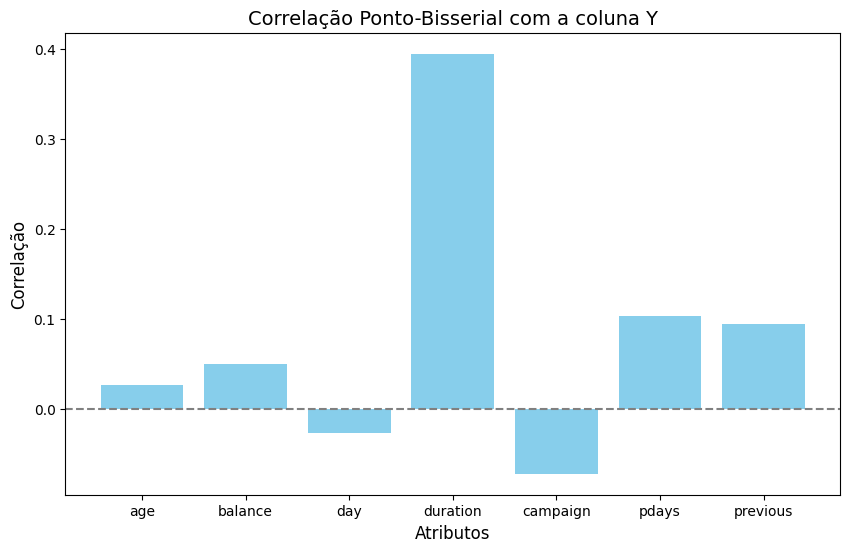

In [ ]:
# Dicionário com as correlações obtidas
correlations = {
    'age': 0.0269,
    'balance': 0.0497,
    'day': -0.0268,
    'duration': 0.3951,
    'campaign': -0.0721,
    'pdays': 0.1037,
    'previous': 0.0946
}

# Criar o gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(correlations.keys(), correlations.values(), color='skyblue')

# Adicionar título e rótulos aos eixos
plt.title('Correlação Ponto-Bisserial com a coluna Y', fontsize=14)
plt.xlabel('Atributos', fontsize=12)
plt.ylabel('Correlação', fontsize=12)

# Mostrar a linha de 0 para referência
plt.axhline(0, color='gray', linestyle='--')

# Mostrar o gráfico
plt.show()



A correlação ponto-bisserial é utilizada para medir a relação entre uma variável contínua (como `age`, `balance`, etc.) e uma variável binária (`Y`, que indica aceitação ou não da oferta). A correlação varia de -1 a 1, e pode ser interpretada da seguinte forma:

- **Correlação positiva (próxima de 1)**: indica que, à medida que uma variável aumenta, a outra também tende a aumentar.
- **Correlação negativa (próxima de -1)**: indica que, à medida que uma variável aumenta, a outra tende a diminuir.
- **Correlação próxima de 0**: indica pouca ou nenhuma correlação entre as variáveis.

**Resultados**:

1. **age e Y: 0.0269**  
   - A correlação entre a idade e a aceitação do produto bancário é muito baixa. Isso indica que não há uma relação significativa entre a idade dos clientes e a decisão de aceitar a oferta.
   
2. **balance e Y: 0.0497**  
   - A correlação é positiva, mas muito fraca. Isso sugere que, embora exista uma leve tendência de pessoas com saldo bancário maior aceitarem a assinatura, essa relação é tão fraca que pode ser considerada insignificante para a análise preditiva.

3. **day e Y: -0.0268**  
   - A correlação entre o dia do mês em que o contato foi feito e a aceitação do produto bancário é negativa e muito baixa. Isso indica que o dia do mês tem pouca ou nenhuma influência sobre a decisão dos clientes.

4. **duration e Y: 0.3951**  
   - A duração da chamada tem uma correlação positiva moderada com a aceitação do produto. Uma correlação de 0.395 sugere que quanto maior o tempo de duração da chamada, maior a probabilidade de o cliente aceitar a oferta. Esse é o atributo com a maior correlação, o que faz sentido, já que chamadas mais longas podem estar associadas a maior persuasão ou interesse do cliente.

5. **campaign e Y: -0.0721**  
   - A correlação negativa sugere que, quanto mais vezes um cliente foi contatado, menor a chance de ele aceitar a oferta. Embora a correlação seja pequena, isso pode indicar que campanhas repetitivas têm um efeito negativo sobre a decisão do cliente, possivelmente gerando cansaço ou resistência.

6. **pdays e Y: 0.1037**  
   - A correlação é positiva, mas fraca. Isso sugere que, à medida que aumentam os dias desde o último contato, há uma leve tendência de maior aceitação do produto. No entanto, essa relação é muito pequena para ser considerada determinante.

7. **previous e Y: 0.0946**  
   - Assim como `pdays`, a correlação entre o número de contatos anteriores e a aceitação do produto é fraca. Clientes com mais contatos anteriores podem ter uma ligeiramente maior tendência a aceitar a oferta, mas essa influência não é forte o suficiente para ser considerada determinante.

**Resumo Geral**:

- O atributo **`duration`** é o mais relevante para a aceitação do produto, com uma correlação moderada (0.3951). Isso indica que a duração da chamada tem uma influência significativa sobre a decisão do cliente. Portanto, a duração das interações deve ser considerada um dos fatores mais importantes na modelagem preditiva.
  
- Os outros atributos, como **`age`**, **`balance`**, **`day`**, **`campaign`**, **`pdays`** e **`previous`**, possuem correlações muito baixas com `Y`. Isso sugere que eles têm pouca influência individual sobre a aceitação do produto bancário e podem não ser bons preditores por si só.

**Considerações Finais**:
- O foco na **duração das interações** pode ser uma abordagem eficaz para entender e influenciar a decisão dos clientes.
- Para os outros atributos, seria interessante explorar **interações** entre variáveis ou considerar a inclusão de **novas variáveis** para melhorar o modelo preditivo.

##### **Heatmap de Correlação entre Atributos Numéricos**

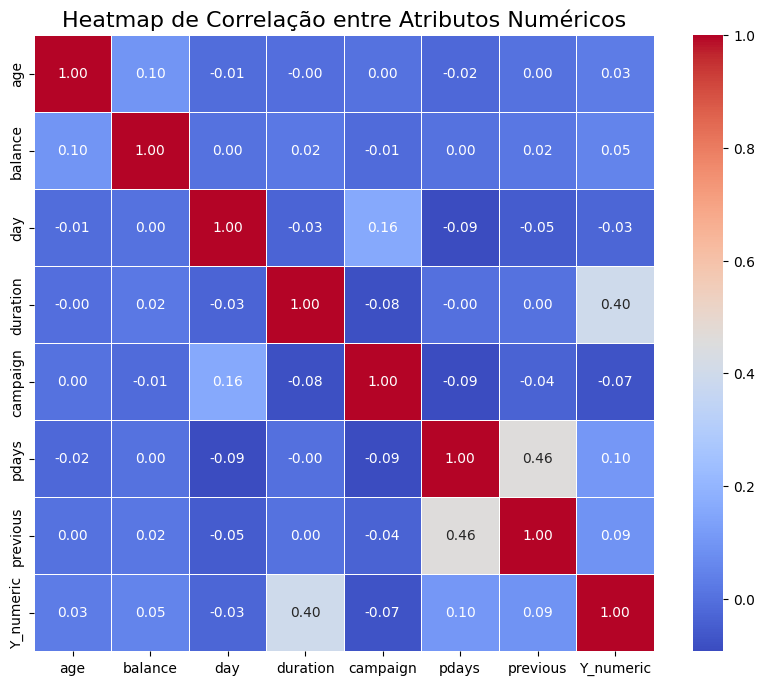

In [ ]:
# colunas numéricas
numerical_columns = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous', 'Y_numeric']

# Calcular a correlação entre as colunas numéricas
correlation_matrix = df_completo[numerical_columns].corr()

# Criar o heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=0.5, fmt=".2f")

# Adicionar título
plt.title("Heatmap de Correlação entre Atributos Numéricos", fontsize=16)

# Mostrar o gráfico
plt.show()

1. **Correlação entre `duration` e `Y_numeric` (0.40)**
   - A variável `duration` tem uma correlação positiva moderada de 0.40 com `Y_numeric`, indicando que interações mais longas podem aumentar a chance de aceitação do produto.

2. **Correlação entre `previous` e `pdays` (0.46)**
   - Existe uma correlação moderada de 0.46 entre `previous` (contatos anteriores) e `pdays` (dias desde o último contato), sugerindo que clientes frequentemente contatados anteriormente tendem a ter um intervalo maior desde o último contato.

3. **Correlação entre `age`, `balance`, `day`, `campaign`, e `pdays`**
   - Estas variáveis mostram correlações muito baixas entre si, indicando que não há uma relação linear direta significativa que conecte essas dimensões.

4. **Correlação entre `age` e outras variáveis (baixa)**
   - A idade (`age`) não mostra correlações fortes com outras variáveis, o que pode indicar que a idade, por si só, não é um fator crítico nas campanhas observadas.

5. **Correlação entre `pdays` e `Y_numeric` (0.10)**  
   - `pdays` tem uma correlação fraca de 0.10 com `Y_numeric`, sugerindo que o tempo desde o último contato tem um impacto limitado na aceitação do produto.


**Considerações Finais**:
- **Foco na duração das interações**: `duration` é a variável com maior correlação com o resultado, sugerindo que focar em prolongar as interações pode ser uma estratégia eficaz.
- **Segmentação baseada no histórico de interações**: A correlação entre `previous` e `pdays` pode ser utilizada para segmentar clientes em futuras campanhas.
- **Independência das outras variáveis**: As baixas correlações entre a maioria das variáveis indicam que elas podem ter efeitos independentes ou não lineares sobre os resultados.

## **Pré-processamento de dados**:


### Tratamentos Aplicados:

1. **Remoção de Outliers**:
   - Removi os outliers com base em um limite de 3 vezes o desvio padrão para eliminar valores extremos que poderiam distorcer a análise. Esse tratamento foi aplicado às variáveis `balance`, `duration`, `campaign` e `pdays` para garantir que dados extremos não influenciem negativamente o modelo.

2. **Criação de Categorias e Flags**:
   - **Duration**: Como a variável `duration` apresentou variações relevantes, foi categorizada em quatro faixas: `curta`, `média`, `longa` e `muito longa`. Isso facilita a interpretação e a modelagem, transformando a variável contínua em intervalos discretos.
   - **Pdays**: Criei uma flag binária para representar se o cliente foi contatado recentemente, com base no valor de `pdays`. Se o cliente foi contatado recentemente, a flag recebe o valor 1, caso contrário, recebe 0.

3. **Conversão de Variáveis Categóricas (One-Hot Encoding)**:
   - Para que o modelo de machine learning possa trabalhar com variáveis categóricas, apliquei **One-Hot Encoding** nas variáveis `job`, `marital`, `education`, `default`, `housing`, `loan`, `contact`, `month`, `poutcome`, `duration_category` e a variável `y` (Apesar de já ter criado uma coluna binária para `Y` em etapas anteriores, ela foi excluída nesse ponto do processo e será recriada para garantir a consistência da análise). Isso cria colunas binárias para cada valor único dessas categorias, possibilitando que o modelo utilize essas informações corretamente.

4. **Separação dos Dados para Treino e Teste**:
   - Após o pré-processamento, separei os dados em conjuntos de **treino** (70%) e **teste** (30%). Esta divisão foi feita para garantir que o modelo seja avaliado de maneira justa em dados "nunca vistos" e que os resultados possam ser generalizados para novos dados.

5. **Normalização (Aplicada Após a Separação dos Dados)**:
   - Após a separação dos dados em treino e teste, foi aplicada a **normalização** usando o **MinMaxScaler** apenas nos dados de treino e, em seguida, o mesmo scaler foi aplicado aos dados de teste. Essa normalização é crucial para garantir que todas as variáveis numéricas, como `balance`esteja na mesma escala, ajustando os valores para o intervalo entre 0 e 1.
   - **Por que a normalização é aplicada após a separação?**: A normalização precisa ser ajustada apenas com os dados de treino para evitar **vazamento de dados** (data leakage). Se normalizássemos os dados antes da separação, os parâmetros de normalização (mínimo e máximo) dos dados de teste influenciariam o ajuste do scaler, resultando em um modelo que teria "visto" dados de teste durante o treino, o que distorceria a avaliação do modelo.

6. **Balanceamento com SMOTE**:
   - Para lidar com o desequilíbrio entre as classes, apliquei a técnica de **SMOTE** (Synthetic Minority Over-sampling Technique) ao conjunto de treino. O SMOTE cria exemplos sintéticos da classe minoritária para equilibrar a distribuição das classes, permitindo que o modelo tenha mais exemplos dessa classe para aprender. A técnica foi aplicada apenas nos dados de treino (`X_train` e `y_train`), garantindo que o conjunto de teste mantenha a distribuição original das classes.
   - **Por que aplicar SMOTE apenas no treino?**: O SMOTE é aplicado apenas nos dados de treino porque o objetivo é ajudar o modelo a aprender padrões da classe minoritária sem influenciar o conjunto de teste. O conjunto de teste deve refletir a distribuição real dos dados para que a avaliação do modelo seja precisa e imparcial.

### 1. **Tratamento de Outliers**
Os outliers são valores extremos que podem distorcer os resultados da análise e da modelagem.
Para tratá-los, apliquei uma regra de 3 vezes o desvio padrão. Dessa forma, valores que estão
além de 3 desvios da média são considerados outliers e removidos.
Neste caso, removemos outliers das colunas balance, duration, campaign e pdays.

In [ ]:
# Removendo outliers das colunas balance, duration, campaign, pdays
df_cleaned = df_completo.copy()
for col in ['balance', 'duration', 'campaign', 'pdays']:
    df_cleaned = remove_outliers(df_cleaned, col)

df_cleaned.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,Y_numeric
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no,0
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no,0
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no,0
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no,0
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no,0


### 2. **Criação de Categorias e Flags**
Algumas variáveis, como duration e pdays, foram transformadas para facilitar a interpretação do modelo.
Duration foi categorizada em quatro intervalos: curta, média, longa e muito longa duração.
Além disso, uma flag binária foi criada para indicar se o cliente foi contatado recentemente ou não, com base na variável pdays.

In [ ]:
# Categorias de duração em intervalos definidos
df_cleaned['duration_category'] = pd.cut(df_cleaned['duration'], bins=[0, 100, 300, 600, np.inf], labels=['curta', 'media', 'longa', 'muito_longa'])

# Flag binária para indicar se o cliente foi contatado recentemente
df_cleaned['recent_contact'] = df_cleaned['pdays'].apply(lambda x: 1 if x != -1 else 0)


# Removendo as colunas 'pdays' e 'duration', já que foram transformadas
df_cleaned = df_cleaned.drop(columns=['pdays', 'duration'])

# Visualizando as primeiras linhas para confirmar a remoção
df_cleaned.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,previous,poutcome,y,Y_numeric,duration_category,recent_contact
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,1,0,unknown,no,0,curta,0
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,1,4,failure,no,0,media,1
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,1,1,failure,no,0,media,1
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,4,0,unknown,no,0,media,0
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,1,0,unknown,no,0,media,0


### 3. **Conversão de Variáveis Categóricas (One-Hot Encoding)**
As variáveis categóricas precisam ser convertidas em um formato que os modelos de machine learning possam entender.
Para isso, usamos o One-Hot Encoding, que cria colunas binárias (0 ou 1) para cada valor único das variáveis categóricas.

In [ ]:
# Aplicando One-Hot Encoding para as variáveis categóricas, excluindo a coluna 'y' (já binarizada)
df_encoded = pd.get_dummies(df_cleaned, columns=['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'duration_category'], drop_first=True)



df_final = df_encoded.drop(columns=['y'])  # Removendo a coluna 'y' pois ja estamos usando 'Y_numeric'

# Exibir as primeiras linhas do DataFrame final
df_final.head()

,age,balance,day,campaign,previous,Y_numeric,recent_contact,job_blue-collar,job_entrepreneur,job_housemaid,...,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown,duration_category_media,duration_category_longa,duration_category_muito_longa
0,30,1787,19,1,0,0,0,False,False,False,...,False,False,True,False,False,False,True,False,False,False
1,33,4789,11,1,4,0,1,False,False,False,...,True,False,False,False,False,False,False,True,False,False
2,35,1350,16,1,1,0,1,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3,30,1476,3,4,0,0,0,False,False,False,...,False,False,False,False,False,False,True,True,False,False
4,59,0,5,1,0,0,0,True,False,False,...,True,False,False,False,False,False,True,True,False,False


### 4. **Separação dos Dados para Treino e Teste**
Para garantir que o modelo possa ser avaliado adequadamente, os dados são separados em conjuntos de treino e teste.
Usamos 70% dos dados para treino e 30% para teste.

In [ ]:

# Separando as features e o target (variável Y_numeric)
X = df_final.drop(columns='Y_numeric')  # Excluindo a coluna 'Y_numeric', que é o target
y = df_final['Y_numeric']  # Definindo 'Y_numeric' como target

# Separando os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### 5. **Normalização**
A variável numérica balance possue escalas muito diferentes.
Para garantir que todas as variáveis numéricas estejam na mesma escala, aplicamos a normalização usando o MinMaxScaler.
Isso ajusta os valores para um intervalo entre 0 e 1.

In [ ]:
# Normalizando apenas a variável 'balance'
scaler = MinMaxScaler()

# Ajusta o scaler apenas no conjunto de treino
X_train[['balance']] = scaler.fit_transform(X_train[['balance']])

# Aplica a transformação ao conjunto de teste usando os parâmetros do treino
X_test[['balance']] = scaler.transform(X_test[['balance']])

# Visualizando as primeiras linhas dos dados normalizados
print(X_train.head())
print(X_test.head())

       age   balance  day  campaign  previous  recent_contact  \
30021   34  0.255433   19         1         0               0   
41619   59  0.283219   13         1         0               0   
34354   57  0.247111    4         1         6               1   
47863   27  0.746080   22         2        28               1   
18152   50  0.273865    9         7         0               0   

       job_blue-collar  job_entrepreneur  job_housemaid  job_management  ...  \
30021             True             False          False           False  ...   
41619             True             False          False           False  ...   
34354            False             False          False           False  ...   
47863            False             False          False            True  ...   
18152            False             False          False           False  ...   

       month_may  month_nov  month_oct  month_sep  poutcome_other  \
30021      False       True      False      False          

### 6. **Balanceamento**
O dataset original apresentava um desequilíbrio significativo entre as classes, com a classe majoritária sendo muito mais representada do que a minoritária. Esse desequilíbrio pode impactar negativamente a performance do modelo, pois ele pode ter uma tendência a prever mais a classe majoritária. Para corrigir isso, apliquei a técnica **SMOTE (Synthetic Minority Over-sampling Technique)**. O SMOTE gera exemplos sintéticos da classe minoritária com base nos seus vizinhos mais próximos, criando novos pontos de dados e equilibrando a distribuição de classes. Essa técnica ajuda o modelo a aprender de maneira mais eficiente sobre a classe minoritária sem simplesmente duplicar amostras existentes.


In [ ]:
# Aplicando SMOTE para o conjunto de treino
smote = SMOTE(random_state=42)

X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Visualizando o balanceamento das classes após o SMOTE
print("Distribuição das classes antes do SMOTE:", y_train.value_counts())
print("Distribuição das classes após o SMOTE:", y_train_smote.value_counts())

Distribuição das classes antes do SMOTE: Y_numeric
0    28385
1     3343
Name: count, dtype: int64
Distribuição das classes após o SMOTE: Y_numeric
0    28385
1    28385
Name: count, dtype: int64


## **Conclusão**:

O projeto analisou uma campanha bancária visando prever o comportamento dos clientes em relação à assinatura de um depósito a prazo. Através de uma abordagem estruturada de ciência de dados, aplicamos diversas técnicas para preparar, limpar e transformar os dados, garantindo uma base sólida para a modelagem preditiva.

**Principais insights:**

1. **Variáveis Críticas:** A análise indicou que atributos como saldo bancário, duração da chamada e o histórico de interações anteriores foram determinantes no comportamento dos clientes. Essas variáveis apresentaram forte correlação com a decisão de assinar o produto financeiro.

2. **Tratamento de Outliers e Normalização:** Remover outliers e aplicar normalização garantiram que os dados fossem representativos e equilibrados, minimizando distorções durante a modelagem.

3. **Desbalanceamento da Classe Y:** O dataset original apresentava um desbalanceamento significativo na variável Y, com uma grande maioria de clientes que não assinaram o depósito. Para corrigir isso, aplicamos a técnica de SMOTE, que gerou exemplos sintéticos da classe minoritária, equilibrando a distribuição das classes e permitindo que o modelo aprenda de forma mais eficiente sobre ambas as classes.

4. **Pré-processamento Robusto:** Um pipeline consistente foi implementado, abrangendo desde a criação de categorias até o one-hot encoding das variáveis categóricas, além da separação adequada entre treino e teste. Isso assegura que o modelo tenha uma performance mais robusta e generalizável.

Com esses tratamentos, os dados estão prontos para a fase de modelagem, onde poderão ser aplicados algoritmos de classificação para prever com mais precisão a probabilidade de um cliente assinar o depósito a prazo. O foco em boas práticas de ciência de dados, como o balanceamento de classes e a normalização, aumenta a confiabilidade dos resultados.